In [1]:
# load system module
import os, re
import sqlite3

# load necessary module
import rdkit
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

RDKit WARNING: [11:10:31] Enabling RDKit 2019.09.3 jupyter extensions


## PhysProp

In [2]:
df = pd.read_csv('/Users/dongdongzhang/Desktop/group/logp/LogP_data.csv')

In [3]:
df.shape

(14208, 26)

In [4]:
df.head()

,ChemID,CAS,CAS_checksum,NAME,name_error,preferred_name,iupac,SMILES,STAR_flag,New STAR flag,...,Kow Data Type,Kow Reference,Train,Kowwin,Error,Tr_1_Tst_0,gsid,dsstox_substance_id,qc_level,dsstox_compound_id
0,100001.0,50-00-0,ValidCAS,FORMALDEHYDE,Ok,Formaldehyde,formaldehyde,C=O,4 STAR,4 STAR,...,EXP,"HANSCH,C ET AL. (1995)",S,0.35,0.000,1,20637,DTXSID7020637,DSSTox_High,DTXCID30637
1,100002.0,"50-02-2, 378-44-9",ValidCAS,"DEXAMETHASONE, BETAMETHASONE",Warning: Structure is taken from ACD/Dictionary,Dexamethasone,"(11beta,16alpha)-9-fluoro-11,17,21-trihydroxy-...",C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,4 STAR Enhanced Stereochemistry,4 STAR Enhanced Stereochemistry,...,EXP,"HANSCH,C ET AL. (1995)",T,1.72,0.165,1,20384,DTXSID3020384,DSSTox_High,DTXCID10384
2,100003.0,50-03-3,ValidCAS,HYDROCORTISONE ACETATE,Warning: Structure is taken from ACD/Dictionary,Hydrocortisone acetate,"(8xi,9xi,11beta,14xi)-11,17-dihydroxy-3,20-dio...",CC(=O)OCC(=O)[C@@]1(O)CCC2C3CCC4=CC(=O)CC[C@]4...,4 STAR Enhanced Stereochemistry,4 STAR Enhanced Stereochemistry,...,EXP,"HANSCH,C ET AL. (1995)",T,2.36,-0.170,1,48686,DTXSID0048686,DSSTox_Low,DTXCID0028612
3,100004.0,50-04-4,ValidCAS,CORTISONE ACETATE,Warning: Structure is taken from ACD/Dictionary,Cortisone acetate,"17-hydroxy-3,11,20-trioxopregn-4-en-21-yl acetate",CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...,4 STAR Enhanced Stereochemistry,4 STAR Enhanced Stereochemistry,...,EXP,"HANSCH,C ET AL. (1995)",T,2.14,-0.040,1,22858,DTXSID0022858,DSSTox_Low,DTXCID502858
4,100005.0,50-06-6,ValidCAS,PHENOBARBITAL,Warning: Structure is taken from ACD/Dictionary,Phenobarbital,"5-ethyl-5-phenylpyrimidine-2,4,6(1H,3H,5H)-trione",CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,4 STAR,4 STAR,...,EXP,"HANSCH,C ET AL. (1995)",T,1.33,0.140,0,21122,DTXSID5021122,DSSTox_Low,DTXCID701122


In [5]:
df.describe()

,ChemID,Salt_Solvent_ID,Kow,Kowwin,Error,Tr_1_Tst_0
count,14208.000000,94.000000,14208.000000,14208.000000,14208.000000,14208.000000
mean,107693.100718,7.617021,2.064657,2.107655,-0.042995,0.800324
std,4548.802761,17.042077,1.831527,1.869549,0.612593,0.399771
min,100001.000000,1.000000,-11.960000,-5.620000,-18.240000,0.000000
25%,103719.750000,3.000000,0.880000,0.900000,-0.270000,1.000000
50%,107611.500000,4.000000,1.990000,2.010000,0.000000,1.000000
75%,111632.250000,7.000000,3.150000,3.190000,0.240000,1.000000
max,115805.000000,103.000000,11.290000,19.600000,4.270000,1.000000


In [6]:
df['Kow Data Type'].describe()

count     14208
unique        1
top         EXP
freq      14208
Name: Kow Data Type, dtype: object

In [7]:
df[df['Kow Data Type'] != 'EXP'].shape

(0, 26)

In [8]:
df_use1 = df[['SMILES', 'Kow']]

In [9]:
df_use1['Mol'] = [Chem.MolFromSmiles(i) for i in df_use1['SMILES']]

RDKit ERROR: [11:26:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [11:26:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [11:26:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [11:26:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5
RDKit ERROR: 
RDKit ERROR: [11:26:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [11:26:04] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
RDKit ERROR: 
RDKit ERROR: [11:26:04] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 6 7 12 13 14
RDKit ERROR: 
RDKit ERROR: [11:26:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5
RDKit ERROR: 
RDKit ERROR: [11:26:04] SMILES Parse Error: syntax error while parsing: c1cc(N(=O)=O)cc(N(=O)=O)c1O(K)
RDKit ERROR: [11:26:04] SMILES Parse Error: Failed parsing SMILES 'c1cc(N(=O)=O)cc(N(=O)=O)c1O(K)' for i

RDKit ERROR: [11:26:07] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16
RDKit ERROR: 
RDKit ERROR: [11:26:07] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [11:26:07] Can't kekulize mol.  Unkekulized atoms: 13 14 16 17 18 19 21 22 23
RDKit ERROR: 
RDKit ERROR: [11:26:07] Can't kekulize mol.  Unkekulized atoms: 11 13 17
RDKit ERROR: 
RDKit ERROR: [11:26:07] Can't kekulize mol.  Unkekulized atoms: 2 4 8
RDKit ERROR: 
RDKit ERROR: [11:26:07] Can't kekulize mol.  Unkekulized atoms: 7 9 13
RDKit ERROR: 
RDKit ERROR: [11:26:07] Can't kekulize mol.  Unkekulized atoms: 9 11 15
RDKit ERROR: 
RDKit ERROR: [11:26:07] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [11:26:07] Can't kekulize mol.  Unkekulized atoms: 9 10 14
RDKit ERROR: 
RDKit ERROR: [11:26:07] Can't kekulize mol.  Unkekulized atoms: 1 2 3 22 23 24 25
RDKit ERROR: 
RDKit ERROR: [11:26:07] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 18 

RDKit ERROR: [11:26:08] Can't kekulize mol.  Unkekulized atoms: 8 9 11 12 13 14 16 17 18
RDKit ERROR: 
RDKit ERROR: [11:26:08] Explicit valence for atom # 18 N, 4, is greater than permitted
RDKit ERROR: [11:26:08] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [11:26:08] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [11:26:08] Can't kekulize mol.  Unkekulized atoms: 20 21 22 24 26
RDKit ERROR: 
RDKit ERROR: [11:26:08] Can't kekulize mol.  Unkekulized atoms: 20 21 22 24 26
RDKit ERROR: 
RDKit ERROR: [11:26:08] Can't kekulize mol.  Unkekulized atoms: 20 21 22 24 26
RDKit ERROR: 
RDKit ERROR: [11:26:08] Can't kekulize mol.  Unkekulized atoms: 20 21 22 23 25
RDKit ERROR: 
RDKit ERROR: [11:26:08] Can't kekulize mol.  Unkekulized atoms: 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [11:26:08] Can't kekulize mol.  Unkekulized atoms: 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [11:26:08] Can't kekulize mol.  Unkekulized ato

RDKit ERROR: 
/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_use2 = df_use1[~pd.isnull(df_use1['Mol'])].reset_index(drop=True)

In [11]:
df_use2.shape

(13845, 3)

In [12]:
df_use2['InChI'] = [Chem.MolToInchi(i) for i in df_use2['Mol']]

RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Charges were rearranged
RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Proton(s) added/removed
RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Charges were rearranged
RDKit WARNING: [11:27:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:56] WARNING: Proton(s

RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Charges were rearranged
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitte

RDKit WARNING: [11:27:57] WARNING: Charges were rearranged
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Charges were rearranged
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Charges were rearranged
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted 

RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Charges were rearranged
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Proton(s) added/removed
RDKit WARNING: [11:27:57] WARNING: Proton(s) added/removed
RDKit WARNING: [11:27:57] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:27:57] WARNING: Charges were rearranged
RDKit WARNING: [11:27:57] WARNING: Charges were rearranged
RDKit WARNING: [11:27:57] WARNING: Charges were rearranged
RDKit WARNING: [11:27:57] WARNING: Charges were rearrang

RDKit WARNING: [11:27:58] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:27:58] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:27:58] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:27:58] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:27:58] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:27:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:58] WARNING: Charges were rearranged
RDKit WARNING: [11:27:58] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:27:58] WARNING: Charges were rearranged
RDKit WARNING: [11:27:58] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:27:58] WARNING: Charges were rearranged
RDKit WARNING: [11:27:58] WARNING: Omitted undef

RDKit WARNING: [11:27:59] WARNING: Charges were rearranged
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Charges were rearranged
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Charges were rearranged
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Charges were rearranged
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Charges were rearranged
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted un

RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Charges were rearranged
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Charges were rearranged
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Charges were rearranged
RDKit WARNING: [11:27:59] WARNING: Charges were rearranged
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Proton(s) added/removed
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Charges were rearranged; Omitted undefined st

RDKit WARNING: [11:27:59] WARNING: Charges were rearranged
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:27:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Charges were rearranged
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Charges were rearranged
RDKit WARNING: [11:28:00] WARNING: Charges were rearranged
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted u

RDKit WARNING: [11:28:00] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Charges were rearranged
RDKit WARNING: [11:28:00] WARNING: Charges were rearranged
RDKit WARNING: [11:28:00] WARNING: Charges were rearranged
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined 

RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Charges were rearranged
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitte

RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Charges were rearranged
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Charges were rearranged
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:00] WARNING: Charges

RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged; Om

RDKit WARNING: [11:28:01] WARNING: Charges were rearranged
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Proton(s) added/removed
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted un

RDKit WARNING: [11:28:01] WARNING: Charges were rearranged
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:01] WARNING: Omitted undefined stereo
RDK

RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Charges were rearranged
RDKit WARNING: [11:28:02] WARNING: Charges were rearranged
RDKit WARNING: [11:28:02] WARNING: Charges

RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Charges were rearranged
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Charges were rearranged
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Charges were rearranged
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Charges were rearranged
RDKit WARNING: [11:28:02] WARNING: Omitted u

RDKit WARNING: [11:28:02] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:02]

RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Charges were rearranged
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Charges were rearranged
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Charges were rearranged
RDKit WARNING: [11:28:03] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Charges were rearranged
RDKit WARNING: [11:28:03] WARNING: Charges were rearra

RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Charges were rearranged
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:03] WARNING: Omitt

In [13]:
df_use2['Mol_From_InChI'] = [Chem.MolFromInchi(i) for i in df_use2['InChI']]

RDKit ERROR: [11:28:04] WARNING: Om[11:28:13] Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [11:28:13] ERROR: Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [11:28:17] Explicit valence for atom # 9 N, 4, is greater than permitted
RDKit ERROR: [11:28:17] ERROR: Explicit valence for atom # 9 N, 4, is greater than permitted
RDKit ERROR: [11:28:18] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [11:28:18] ERROR: Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [11:28:18] Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [11:28:18] ERROR: Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [11:28:18] Explicit valence for atom # 12 N, 4, is greater than permitted


In [14]:
df_use3 = df_use2[~pd.isnull(df_use2['Mol_From_InChI'])].reset_index(drop=True)

In [15]:
df_use3.shape

(13840, 5)

In [16]:
df_use3['InChI_From_InChI'] = [Chem.MolToInchi(i) for i in df_use3['Mol_From_InChI']]

RDKit WARNING: itted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Charges were rearranged
RDKit WARNING: [11:28:04] WARNING: Charges were rearranged
RDKit WARNING: [11:28:04] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:04] WARNING: Omit

RDKit WARNING: [11:28:27] WARNING: Charges were rearranged
RDKit WARNING: [11:28:27] WARNING: Charges were rearranged
RDKit WARNING: [11:28:27] WARNING: Charges were rearranged
RDKit WARNING: [11:28:27] WARNING: Charges were rearranged
RDKit WARNING: [11:28:27] WARNING: Charges were rearranged
RDKit WARNING: [11:28:27] WARNING: Charges were rearranged
RDKit WARNING: [11:28:27] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:27] WARNING: Charges were rearranged
RDKit WARNING: [11:28:27] WARNING: Charges were rearranged
RDKit WARNING: [11:28:27] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:27] WARNING: Charges were rearranged
RDKit WARNING: [11:28:27] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:27] WARNING: Charges were rearranged
RDKit WARNING: [11:28:27] WARNING: Charges were rearranged
RDKit WARNING: [11:28:27] WARNING: Charges were rearranged
RDKit WARNING: [11:28:27] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:27] WARNING: Charges were rear

RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Proton(s) added/removed
RDKit WARNING: [11:28:28] WARNING: Charges were rearranged
RDKit WARNING: [11:28:28] WARNING: Charges were rearranged
RDKit WARNING: [11:28:28] WARNING: Charges were rearranged
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Charges were rearranged
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Charges were rearranged
RDKit WARNING: [11:28:28] WARNING: Charges were rearranged
RDKit WARNING: [11:28:28] WARNING: Charges were rearranged
RDKit WARNING: [11:28:28] WARNING: Charges were 

RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Charges were rearranged
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Charges were rearranged
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Proton(s) added/removed
RDKit WARNING: [11:28:28] WARNING: Charges were rearranged
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:28] WARNING: Proton(s)

RDKit WARNING: [11:28:29] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:29] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:29] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:29] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:29] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:29] WARNING: Proton(s) added/removed
RDKit WARNING: [11:28:29] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:29] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:29] WARNING: Proton(s) added/removed
RDKit WARNING: [11:28:29] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:29] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:29] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:29] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:29] WARNING: Charges were rearranged
RDKit WARNING: [11:28:29] WARNING: Charges were rearranged; Omitted undefined stereo
RDK

RDKit WARNING: [11:28:30] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined

RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:3

RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:30] WARNING: Omitted undefined stereo
RDKit WARNING: 

RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:

RDKit WARNING: [11:28:31] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rea

RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11

RDKit WARNING: [11:28:31] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Proton(s) added/removed
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:31] WARNING: Charges were rearranged
RDKit WARNING: [11:28

RDKit WARNING: [11:28:32] WARNING: Charges were rearranged
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Charges were rearranged
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] W

RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitt

RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Charges were rearranged
RDKit WARNING: [11:28:32] WARNING: Charges were rearranged
RDKit WARNING: [11:28:32] WARNING: Charges were rearranged
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Charges were rearranged
RDKit WARNING: [11:28:32] WARNING: Omitted u

RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:32] WARNING: Omitt

RDKit WARNING: [11:28:33] WARNING: Charges were rearranged
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28

RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted un

RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:33] WARNING: Charges were re

RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged
RDKit WARNING: [11

RDKit WARNING: [11:28:34] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged; Omitted undefine

RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged
RDKit WARNING: [11:28:34] WARNING

In [17]:
df_use4 = df_use3[df_use3['InChI'] == df_use3['InChI_From_InChI']].reset_index(drop=True)

In [18]:
df_use4.shape

(13831, 6)

In [19]:
df_use5 = df_use4[['SMILES', 'InChI', 'Kow']]

In [20]:
df_use5 = df_use5.rename(columns={'Kow': 'LogP'})

In [21]:
df_use5['source'] = 'PhysProp'

In [57]:
df_use5[['SMILES', 'LogP']].to_csv('/Users/dongdongzhang/Desktop/group/logp/physprop_processed.csv', index=False)

## Zang

In [23]:
df1 = pd.read_excel('/Users/dongdongzhang/Desktop/group/logp/ci6b00625_si_002.xlsx', sheet_name='LogP')

In [24]:
df1.head()

,CAS RN,NAME,Preferred_name,IUPAC Name,SMILES,LogP-Measured,LogP-EPISuite Prediction,LogP-Prediction from our model,Training/Test
0,50-00-0,FORMALDEHYDE,Formaldehyde,formaldehyde,C=O,0.350,0.35,-0.243933,Training
1,"50-02-2, 378-44-9","DEXAMETHASONE, BETAMETHASONE",Dexamethasone,"(11beta,16alpha)-9-fluoro-11,17,21-trihydroxy-...",C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,1.885,1.72,2.020716,Training
2,50-03-3,HYDROCORTISONE ACETATE,Hydrocortisone acetate,"(8xi,9xi,11beta,14xi)-11,17-dihydroxy-3,20-dio...",CC(=O)OCC(=O)[C@@]1(O)CCC2C3CCC4=CC(=O)CC[C@]4...,2.190,2.36,2.259751,Training
3,50-04-4,CORTISONE ACETATE,Cortisone acetate,"17-hydroxy-3,11,20-trioxopregn-4-en-21-yl acetate",CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...,2.100,2.14,2.128105,Training
4,50-07-7,MITOMYCIN C,Mitomycin C,"[(1aS,8S,8aR,8bS)-6-amino-8a-methoxy-5-methyl-...",CC1C(=O)C2=C([C@@H](COC(N)=O)[C@@]3(OC)[C@H]4N...,-0.400,-1.18,-0.372462,Training


In [25]:
df1.shape

(14207, 9)

In [26]:
df1_use1 = df1[df1['Training/Test'] == 'Training'].reset_index(drop=True)

In [27]:
df1_use1.shape

(11370, 9)

In [28]:
test = df1[df1['Training/Test'] == 'Test'].reset_index(drop=True)

In [29]:
test.shape

(2837, 9)

In [30]:
df1_use2 = df1_use1[['SMILES', 'LogP-Measured']]

In [31]:
df1_use2['Mol'] = [Chem.MolFromSmiles(i) for i in df1_use2['SMILES']]

RDKit ERROR: [11:28:34] WARNING: Omitted undefine[11:28:18] ERROR: Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [11:30:43] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [11:30:43] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [11:30:43] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5
RDKit ERROR: 
RDKit ERROR: [11:30:43] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [11:30:43] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
RDKit ERROR: 
RDKit ERROR: [11:30:43] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 6 7 12 13 14
RDKit ERROR: 
RDKit ERROR: [11:30:43] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5
RDKit ERROR: 
RDKit ERROR: [11:30:43] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
RDKit ERROR: 
RDKit ERROR: [11:30:43] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 7
RDKit ERROR

RDKit ERROR: 
RDKit ERROR: [11:30:45] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [11:30:45] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 14
RDKit ERROR: 
RDKit ERROR: [11:30:45] Can't kekulize mol.  Unkekulized atoms: 14 15 19
RDKit ERROR: 
RDKit ERROR: [11:30:45] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21 22 23
RDKit ERROR: 
RDKit ERROR: [11:30:45] Can't kekulize mol.  Unkekulized atoms: 29 30 31 32 33 34 35 36 37
RDKit ERROR: 
RDKit ERROR: [11:30:45] Can't kekulize mol.  Unkekulized atoms: 23 24 25 26 27 28 29 30 31
RDKit ERROR: 
RDKit ERROR: [11:30:45] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [11:30:45] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [11:30:45] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [11:30:45] Can't kekulize mol.  Unkekulized atoms: 11 12

RDKit ERROR: 
RDKit ERROR: [11:30:46] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 15
RDKit ERROR: 
RDKit ERROR: [11:30:46] Can't kekulize mol.  Unkekulized atoms: 4 5 7 8 9 10 12 13 14
RDKit ERROR: 
RDKit ERROR: [11:30:46] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 14
RDKit ERROR: 
RDKit ERROR: [11:30:46] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [11:30:46] Can't kekulize mol.  Unkekulized atoms: 15 16 18 19 20 21 23 24 25
RDKit ERROR: 
RDKit ERROR: [11:30:46] Explicit valence for atom # 18 N, 4, is greater than permitted
RDKit ERROR: [11:30:46] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit ERROR: [11:30:46] Explicit valence for atom # 18 N, 4, is greater than permitted
RDKit ERROR: [11:30:46] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [11:30:46] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [11:30:46] Can't kekulize

In [32]:
df1_use3 = df1_use2[~pd.isnull(df1_use2['Mol'])].reset_index(drop=True)

In [33]:
df1_use3.shape

(11072, 3)

In [34]:
df1_use3['InChI'] = [Chem.MolToInchi(i) for i in df1_use3['Mol']]

RDKit WARNING: d stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Omitted undefined stereo
RDKit WARNING: [11:28:34] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Charges were rearranged
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Proton(s) added/removed
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Charges were rearranged
RDKit WARNING: [11:31:16] WARNING: Omitted undefined s

RDKit WARNING: [11:31:16] WARNING: Charges were rearranged
RDKit WARNING: [11:31:16] WARNING: Charges were rearranged
RDKit WARNING: [11:31:16] WARNING: Charges were rearranged
RDKit WARNING: [11:31:16] WARNING: Charges were rearranged
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:16] WARNING: Charges were rearranged; Proton(s) added/removed
RDKit WARNING: [11:3

RDKit WARNING: [11:31:17] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:17] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearr

RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:17] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:17] WARNING: Proton(s) added/removed
RDKit WARNING: [11:31:17] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Charges were rearranged
RDKit WARNING: [11:31:17] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:17] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:17] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:17] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:17] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:17] WARNING: Omitted unde

RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Charges were rearranged
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Charges were rearranged
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Charges were rearranged
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Charges were rearranged
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:18] WARNING: Charges were rearranged
RDKit WARNING: [11:31:18] WARNING: Charges were rearranged
RDKit WARNING: [11:31:18] WARNING: Charges were rearranged
RDKit WARNING: [11:3

RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged
RDK

RDKit WARNING: [11:31:19] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: O

RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Charges were rearranged
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:19] WARNING: Omitted

RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11

RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted

RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined st

RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Charges were rearranged
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:20] WARNING: Omitted 

RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Charges were rearranged
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [11:31:21] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:21] WARNING: Omitted undefined stereo
RDKit WARNING: 

In [35]:
df1_use3['Mol_From_InChI'] = [Chem.MolFromInchi(i) for i in df1_use3['InChI']]

RDKit ERROR: [11:31:21] WARNIN[11:31:24] Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [11:31:24] ERROR: Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [11:31:26] Explicit valence for atom # 9 N, 4, is greater than permitted
RDKit ERROR: [11:31:26] ERROR: Explicit valence for atom # 9 N, 4, is greater than permitted
RDKit ERROR: [11:31:27] Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [11:31:27] ERROR: Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [11:31:27] Explicit valence for atom # 12 N, 4, is greater than permitted


In [36]:
df1_use4 = df1_use3[~pd.isnull(df1_use3['Mol_From_InChI'])].reset_index(drop=True)

In [37]:
df1_use4.shape

(11068, 5)

In [38]:
df1_use4['InChI_From_InChI'] = [Chem.MolToInchi(i) for i in df1_use4['Mol_From_InChI']]

RDKit WARNING: G: Omitted undefined stereo
RDKit WARNING: [11:31:22] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:22] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:31:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:22] WARNING: Charges were rearranged
RDKit WARNING: [11:31:22] WARNING: Charges were rearranged
RDKit WARNING: [11:31:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:31:22] WARNING: Charges were rearranged
RDKit WARNING: [11:31:22] WARNING: Charges were rearranged
RDKit WARNING: [11:31:22] WARNING: Charges were rearranged; Omitted und

RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:55] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:55] WARNING: Proton(s) added/removed
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:55] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rea

RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:55] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:55] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:55] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:55] WARNING: Charges were rearranged
RDKit WARNING: [11:32:55] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:55

RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omit

RDKit WARNING: [11:32:56] WARNING: Proton(s) added/removed
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] 

RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Charges were rearranged
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Proton(s) added/removed
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:56] WARNING: Omitted undefined s

RDKit WARNING: [11:32:57] WARNING: Proton(s) added/removed
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Proton(s) added/removed
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted un

RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitte

RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Proton(s) added/removed
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit 

RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefine

RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Proton(s) added/removed
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:57] WARNING: Omitted undefined stereo
RDKit WARNING: [11:

RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitt

RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Charges were rearranged
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitte

RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Charges were rearranged
RDKit WARNING: [11:32:58] WARNING: Charges were rearranged
RDKit WARNING: [11:32:58] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Charges were rearranged
RDKit WARNING: [11:32:58] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:58] WARNING: Omitted undefined 

RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Charges were rearranged
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Charges were rearranged
RDKit WARNING: [11:32:59] WARNING: Charges were rearranged
RDKit WARNING: [11:32:59] WARNING: Charges were rearranged
RDKit WARNING: [11:32:59] WARNING: Charges were rearranged
RDKit WARNING: [11:32:59] WARNING: Charges were rearranged
RDKit WARNING: [11:32:59] WARNING: Charges were rearranged
RDKit WARNING: [11:32:59] WARNING: Charges were rearranged
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:5

RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Charges were rearranged
RDKit WARNING: [11:32:59] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Charges were rearranged
RDKit WARNING: [11:32:59] WARNING: Charge

In [39]:
df1_use5 = df1_use4[df1_use4['InChI'] == df1_use4['InChI_From_InChI']].reset_index(drop=True)

In [40]:
df1_use5.shape

(11062, 6)

In [41]:
df1_use6 = df1_use5[['SMILES', 'InChI', 'LogP-Measured']]

In [42]:
df1_use6 = df1_use6.rename(columns={'LogP-Measured': 'LogP'})

In [43]:
df1_use6['source'] = 'zang'

In [44]:
test_use = test[['SMILES', 'LogP-Measured']]

In [45]:
test_use.shape

(2837, 2)

In [46]:
test_use['Mol'] = [Chem.MolFromSmiles(i) for i in test_use['SMILES']]

RDKit ERROR: [11:32[11:31:27] ERROR: Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [11:33:17] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [11:33:17] SMILES Parse Error: syntax error while parsing: c1cc(N(=O)=O)cc(N(=O)=O)c1O(K)
RDKit ERROR: [11:33:17] SMILES Parse Error: Failed parsing SMILES 'c1cc(N(=O)=O)cc(N(=O)=O)c1O(K)' for input: 'c1cc(N(=O)=O)cc(N(=O)=O)c1O(K)'
RDKit ERROR: [11:33:17] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [11:33:17] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [11:33:17] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [11:33:17] Explicit valence for atom # 9 N, 4, is greater than permitted
RDKit ERROR: [11:33:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
RDKit ERROR: [11:33:17] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 

In [47]:
test_use1 = test_use[~pd.isnull(test_use['Mol'])].reset_index(drop=True)

In [48]:
test_use1.shape

(2772, 3)

In [49]:
test_use1['InChI'] = [Chem.MolToInchi(i) for i in test_use1['Mol']]

RDKit WARNING: :59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted undefined stereo
RDKit WARNING: [11:32:59] WARNING: Omitted und

RDKit WARNING: [11:33:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:21] WARNING: Charges were rearranged
RDKit WARNING: [11:33:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:21] WARNING: Proton(s) added/removed
RDKit WARNING: [11:33:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:21] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:33:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:21] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:33:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:21] WARNING: Charges were rearranged
RDKit WARNING: [11:33:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:21] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:33:21] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:21] WA

RDKit WARNING: [11:33:21] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:

RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [

In [50]:
test_use1['Mol_From_InChI'] = [Chem.MolFromInchi(i) for i in test_use1['InChI']]

RDKit ERROR: [11:33:22] WARNING: O[11:33:24] Explicit valence for atom # 14 N, 4, is greater than permitted


In [51]:
test_use2 = test_use1[~pd.isnull(test_use1['Mol_From_InChI'])].reset_index(drop=True)

In [52]:
test_use2.shape

(2771, 5)

In [53]:
def moltoinchi(x):
    try:
        return Chem.MolToInchi(x)
    except:
        None

In [54]:
test_use2['InChI_From_InChI'] = test_use1['Mol_From_InChI'].apply((lambda x: moltoinchi(x)))

RDKit WARNING: mitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged
RDKit WARNING: [11:33:22] WARNING: Charges were rearranged
RDKit WARNING: [11:33:22] WARNING: Omitte

RDKit WARNING: [11:33:43] WARNING: Proton(s) added/removed
RDKit WARNING: [11:33:43] WARNING: Charges were rearranged
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Proton(s) added/removed
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Charges were rearranged
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Charges were rearranged
RDKit WARNING: [11:33:43] WARNING: Proton(s) added/removed
RDKit WARNING: [11:33:43] WARNING: Omitted und

RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Charges were rearranged
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Charges were rearranged
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:43] WARNING: Omitted

RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Charges were rearranged
RDKit WARNING: [

RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Charges were rearranged
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Charges were rearranged
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted

RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitted undefined stereo
RDKit WARNING: [11:33:44] WARNING: Omitt

In [55]:
test_use3 = test_use2[test_use2['InChI'] == test_use2['InChI_From_InChI']].reset_index(drop=True)

In [56]:
test_use3.shape

(2502, 6)

In [58]:
df1_use6[['SMILES', 'LogP']].to_csv('/Users/dongdongzhang/Desktop/group/logp/zang_processed.csv', index=False)

In [60]:
test_use3.head()

,SMILES,LogP-Measured,Mol,InChI,Mol_From_InChI,InChI_From_InChI
0,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,1.47,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C12H12N2O3/c1-2-12(8-6-4-3-5-7-8)9(15...,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C12H12N2O3/c1-2-12(8-6-4-3-5-7-8)9(15...
1,CC(O)C(O)=O,-0.72,"<img data-content=""rdkit/molecule"" src=""data:i...","InChI=1S/C3H6O3/c1-2(4)3(5)6/h2,4H,1H3,(H,5,6)","<img data-content=""rdkit/molecule"" src=""data:i...","InChI=1S/C3H6O3/c1-2(4)3(5)6/h2,4H,1H3,(H,5,6)"
2,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC...,4.01,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C18H24O2/c1-18-9-8-14-13-5-3-12(19)10...,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C18H24O2/c1-18-9-8-14-13-5-3-12(19)10...
3,O=C1CCC(C(=O)N1)N1C(=O)c2ccccc2C1=O,0.33,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C13H10N2O4/c16-10-6-5-9(11(17)14-10)1...,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C13H10N2O4/c16-10-6-5-9(11(17)14-10)1...
4,CN(C)CCC=C1c2ccccc2CCc2ccccc21,4.92,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...


In [62]:
test_use3[['SMILES', 'LogP-Measured']].to_csv('/Users/dongdongzhang/Desktop/group/logp/test.csv', index=False)

## Combine

In [63]:
dfs = [df_use5, df1_use6]

In [64]:
df_all = pd.concat(dfs).reset_index(drop=True)

In [65]:
df_all.shape

(24893, 4)

In [66]:
len(list(set(df_all['InChI'].tolist())))

13828

In [139]:
count = df_all[['source', 'LogP']].groupby('source').count()

In [140]:
count

,LogP
source,
PhysProp,13831
zang,11062


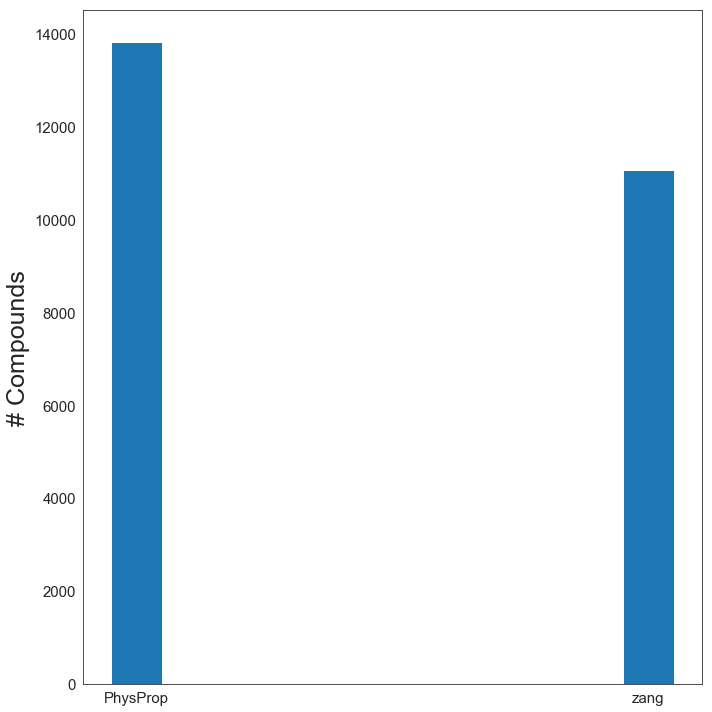

In [142]:
f1 = plt.figure(figsize=(10,10))
ax1 = f1.add_subplot(111)

ax1.axes.bar(count.index.tolist(), \
             count['LogP'].tolist(), width=0.1)

#ax1.set_xlabel('Datasets', fontsize=25)
ax1.set_ylabel('# Compounds', fontsize=25)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
ax1.xaxis.labelpad = 20
plt.tight_layout()

f1.savefig('/Users/dongdongzhang/Desktop/group/logp/datasets.svg', format='svg', dpi=1200)

In [84]:
df_all.groupby('InChI')['LogP'].std().to_frame()['LogP'].describe()

count    11060.000000
mean         0.000002
std          0.000220
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.023094
Name: LogP, dtype: float64

In [87]:
group = df_all.groupby('InChI')['LogP'].count().to_frame()

In [88]:
group.head()

,LogP
InChI,
"InChI=1S/C10Cl10O/c11-2-1(21)3(12)6(15)4(2,13)8(17)5(2,14)7(3,16)9(6,18)10(8,19)20",2
"InChI=1S/C10Cl12/c11-1-2(12)7(17)4(14)3(13,5(1,15)9(7,19)20)6(1,16)10(21,22)8(2,4)18",2
InChI=1S/C10Cl8/c11-3-1-2(5(13)9(17)7(3)15)6(14)10(18)8(16)4(1)12,1
"InChI=1S/C10H10BrFN4O2/c11-8-7-9(14-3-13-8)16(4-15-7)10-6(12)1-5(2-17)18-10/h3-6,10,17H,1-2H2",2
"InChI=1S/C10H10BrN5O/c1-17-7-3-2-5(11)4-6(7)8-14-9(12)16-10(13)15-8/h2-4H,1H3,(H4,12,13,14,15,16)",2


In [96]:
df_all[df_all['InChI'] == 'InChI=1S/C10Cl10O/c11-2-1(21)3(12)6(15)4(2,13)8(17)5(2,14)7(3,16)9(6,18)10(8,19)20'].std().values[0]

0.0

In [97]:
values_std = {}
for inchi in group[group['LogP'] > 1].index.tolist():
    values_std[inchi] = df_all[df_all['InChI'] == inchi].std().values[0]

In [103]:
[key for key, val in values_std.items() if val > 0.01]

['InChI=1S/C5H5N5/c6-4-3-5(9-1-7-3)10-2-8-4/h1-2H,(H3,6,7,8,9,10)']

In [104]:
df_all[df_all['InChI'] == 'InChI=1S/C5H5N5/c6-4-3-5(9-1-7-3)10-2-8-4/h1-2H,(H3,6,7,8,9,10)']

,SMILES,InChI,LogP,source
325,Nc1[n]c[n]c2[nH]c[n]c21,InChI=1S/C5H5N5/c6-4-3-5(9-1-7-3)10-2-8-4/h1-2...,-0.09,PhysProp
7946,n1c(N)c2N=CNc2nc1,InChI=1S/C5H5N5/c6-4-3-5(9-1-7-3)10-2-8-4/h1-2...,-0.05,PhysProp
14091,Nc1[n]c[n]c2[nH]c[n]c21,InChI=1S/C5H5N5/c6-4-3-5(9-1-7-3)10-2-8-4/h1-2...,-0.09,zang
20191,n1c(N)c2N=CNc2nc1,InChI=1S/C5H5N5/c6-4-3-5(9-1-7-3)10-2-8-4/h1-2...,-0.05,zang


In [105]:
df_all_use = df_all.groupby('InChI')['LogP'].mean().to_frame()

In [106]:
df_all_use['InChI'] = df_all_use.index

In [107]:
df_all_use.index = range(13828)

In [108]:
df_all_use.head()

,LogP,InChI
0,5.41,"InChI=1S/C10Cl10O/c11-2-1(21)3(12)6(15)4(2,13)..."
1,6.89,"InChI=1S/C10Cl12/c11-1-2(12)7(17)4(14)3(13,5(1..."
2,8.50,InChI=1S/C10Cl8/c11-3-1-2(5(13)9(17)7(3)15)6(1...
3,0.44,InChI=1S/C10H10BrFN4O2/c11-8-7-9(14-3-13-8)16(...
4,1.53,InChI=1S/C10H10BrN5O/c1-17-7-3-2-5(11)4-6(7)8-...


In [109]:
df_all_use['Mol'] = [Chem.MolFromInchi(i) for i in df_all_use['InChI']]

In [110]:
df_all_use['SMILES'] = [Chem.MolToSmiles(i) for i in df_all_use['Mol']]

In [111]:
df_all_use.shape

(13828, 4)

In [112]:
test_use3.shape

(2502, 6)

In [113]:
len(list(set(df_all_use['InChI']) & set(test_use3['InChI'])))

2502

In [114]:
df_all_use1 = df_all_use[~df_all_use['InChI'].isin(test_use3['InChI'])].reset_index(drop=True)

In [115]:
df_all_use1.shape

(11326, 4)

In [116]:
from rdkit.Chem.rdMolDescriptors import CalcMolFormula

from collections import Counter

In [117]:
ALLOWABLE_ATOM_SYMBOLS = ['H', 'C', 'N', 'O', 'S', 'F', 'I', 'P', 'Cl', 'Br']

In [118]:
df_all_use1['Formula'] = [CalcMolFormula(i) for i in df_all_use1['Mol']]

In [119]:
df_all_use1['element_'] = df_all_use1['Mol'].apply(lambda x: list(Counter(atom.GetSymbol() for atom in x.GetAtoms()).keys()))

In [120]:
df_all_use1['filter'] = df_all_use1['element_'].apply(lambda x: True if set(x) < set(ALLOWABLE_ATOM_SYMBOLS) else False)

In [121]:
df_all_use2 = df_all_use1[df_all_use1['filter']]

In [122]:
df_all_use2.shape

(11281, 7)

In [123]:
test_use3['Formula'] = [CalcMolFormula(i) for i in test_use3['Mol']]

In [124]:
test_use3['element_'] = test_use3['Mol'].apply(lambda x: list(Counter(atom.GetSymbol() for atom in x.GetAtoms()).keys()))

In [125]:
test_use3['filter'] = test_use3['element_'].apply(lambda x: True if set(x) < set(ALLOWABLE_ATOM_SYMBOLS) else False)

In [126]:
test_use4 = test_use3[test_use3['filter']]

In [127]:
test_use4.shape

(2482, 9)

In [129]:
len(list(set(df_all_use2['InChI']) & set(test_use4['InChI'])))

0

In [65]:
df_all_use2[['SMILES', 'InChI', 'LogP']].to_csv('/beegfs/dz1061/datasets/logp/logp_all_processed.csv', index=False)

In [131]:
test_use4[['SMILES', 'InChI', 'LogP-Measured']].rename(columns={'LogP-Measured': 'LogP'}).to_csv('/Users/dongdongzhang/Desktop/group/logp/test.csv', index=False)

In [4]:
df_all['Mol'] = [Chem.MolFromSmiles(i) for i in df_all["SMILES"]]

In [133]:
from rdkit.Chem.Descriptors import ExactMolWt

In [134]:
df_all_use2['MW'] = [ExactMolWt(i) for i in df_all_use2['Mol']]

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
df_all_use2[df_all_use2['MW']>1000]['SMILES'].values

array(['C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(O)=N[C@@H](CC)C(=O)N(C)CC(=O)N(C)[C@@H](CC(C)C)C(O)=N[C@@H](C(C)C)C(=O)N(C)[C@@H](CC(C)C)C(O)=N[C@@H](C)C(O)=N[C@H](C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](C(C)C)C(=O)N1C',
       'CC(C)(C)c1cc(CCC(=O)OCC(COC(=O)CCc2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)(COC(=O)CCc2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)COC(=O)CCc2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)cc(C(C)(C)C)c1O'],
      dtype=object)

In [7]:
import matplotlib.pyplot as plt

import seaborn as sns

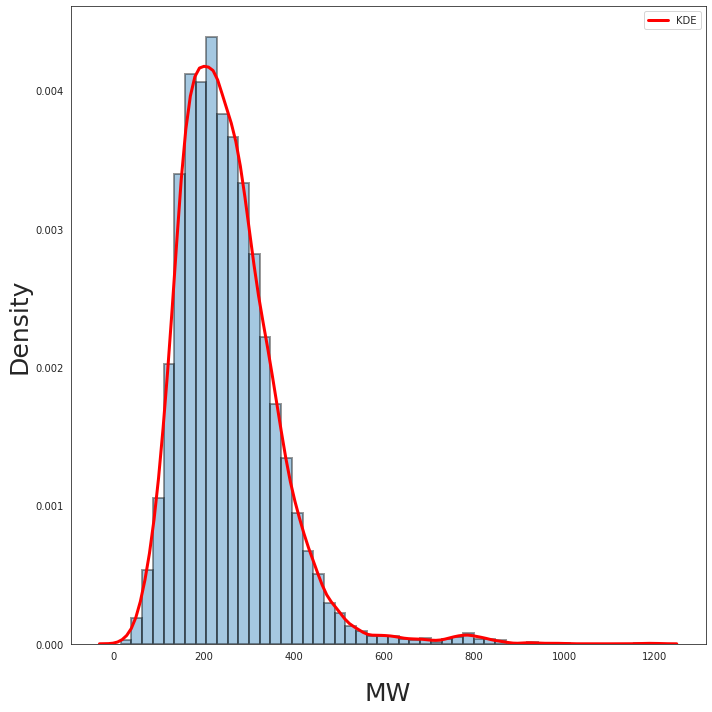

In [11]:
f2 = plt.figure(figsize=(10,10))
ax2 = f2.add_subplot(111)
sns.distplot(df_all['MW'], kde_kws={"color":"red", "lw": 3, "label": "KDE"}, hist_kws=dict(edgecolor="k", linewidth=2), ax=ax2)

ax2.set_xlabel('MW', fontsize=25)
ax2.set_ylabel('Density', fontsize=25)
ax2.xaxis.labelpad = 20
plt.tight_layout()

In [12]:
f2.savefig('/beegfs/dz1061/datasets/logp/mw_distribution.svg', format='svg', dpi=1200)